# Qué son los outliers y cómo impactan en el análisis de datos: Guía definitiva

**Descubre cómo los outliers afectan la interpretación de datos y su importancia en análisis estadísticos para obtener conclusiones precisas**

*Tutorial creado por Borja Barber Lead Intructor The Bridge*

---

¿Alguna vez has trabajado en un análisis de datos y de repente te has encontrado con un valor tan extraño que parece arruinar todo tu trabajo? Si es así, probablemente te hayas topado con un **outlier**. No te preocupes, ¡estás en buena compañía! En MBIT School llevamos 10 años ayudando a futuros científicos de datos a dominar estos desafíos.

## ¿Qué son exactamente los outliers y por qué deberían importarte?

### Definición: esos puntos rebeldes en tus datos

Los **outliers** (o valores atípicos) son como esos invitados inesperados que aparecen en una fiesta y cambian completamente la dinámica. Son observaciones que se alejan significativamente del comportamiento general de tus datos.

Imagina que analizas los salarios de una empresa donde la mayoría gana entre 30.000€ y 60.000€ anuales, pero hay un único empleado que gana 500.000€. Ese valor tan alejado del resto es un clásico ejemplo de outlier.

Estos puntos rebeldes se caracterizan por:

- Estar notablemente alejados del resto (¡como si estuvieran en otra galaxia!)
- Romper los patrones generales que siguen tus datos
- Ser potencialmente legítimos o errores (¡y distinguirlos es parte del desafío!)

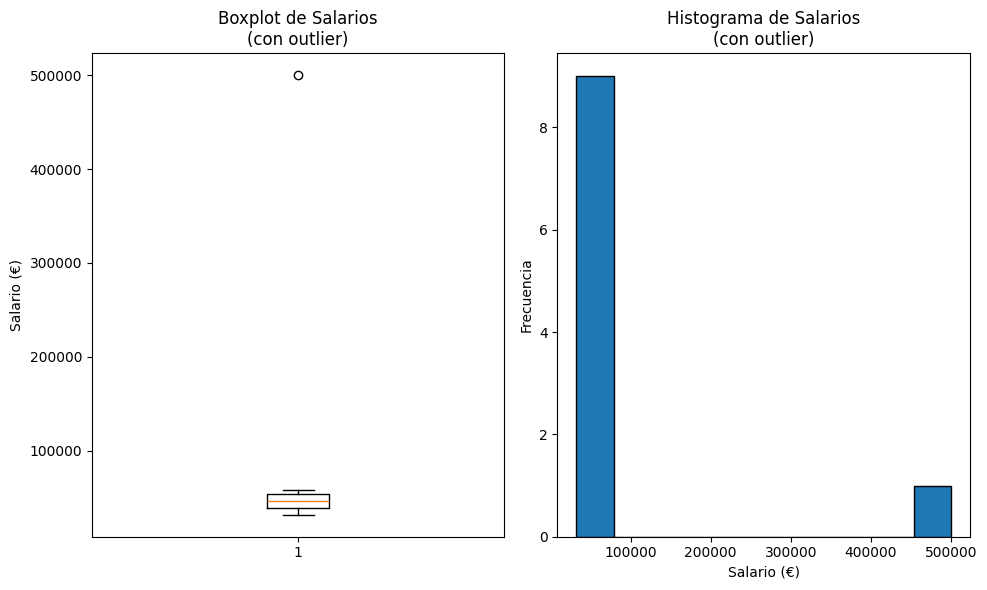

Media con outlier: 90,500€
Mediana con outlier: 46,500€

Media sin outlier: 45,000€
Mediana sin outlier: 45,000€


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Ejemplo de datos con outliers
# Salarios de empleados (la mayoría entre 30k-60k, uno con 500k)
salarios = [32000, 35000, 38000, 42000, 45000, 48000, 52000, 55000, 58000, 500000]

# Visualización básica
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(salarios)
plt.title('Boxplot de Salarios\n(con outlier)')
plt.ylabel('Salario (€)')

plt.subplot(1, 2, 2)
plt.hist(salarios, bins=10, edgecolor='black')
plt.title('Histograma de Salarios\n(con outlier)')
plt.xlabel('Salario (€)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print(f"Media con outlier: {np.mean(salarios):,.0f}€")
print(f"Mediana con outlier: {np.median(salarios):,.0f}€")

# Sin el outlier
salarios_sin_outlier = salarios[:-1]
print(f"\nMedia sin outlier: {np.mean(salarios_sin_outlier):,.0f}€")
print(f"Mediana sin outlier: {np.median(salarios_sin_outlier):,.0f}€")

## El verdadero rompecabezas de los outliers

Los outliers no son solo una curiosidad estadística, son un verdadero quebradero de cabeza por motivos muy concretos:

1. **Distorsionan tus estadísticas básicas**: Un solo valor extremo puede disparar tu media, haciendo que tus conclusiones fallen completamente.

2. **Arruinan tus visualizaciones**: ¿Has intentado hacer un gráfico donde un solo punto hace que el resto parezca una línea plana? Así actúan los outliers en tus visualizaciones.

3. **Confunden a tus modelos predictivos**: La mayoría de algoritmos son sensibles a estos valores extremos, provocando predicciones sesgadas.

4. **Te plantean dilemas constantes**: "¿Elimino este punto o es una señal importante?" Esta pregunta te perseguirá constantemente al trabajar con outliers.

Por ejemplo, si analizas el tiempo de carga de tu sitio web y ves que normalmente tarda 2 segundos, pero ocasionalmente aparecen picos de 20 segundos, ¿son problemas técnicos reales o simplemente ruido que deberías ignorar?

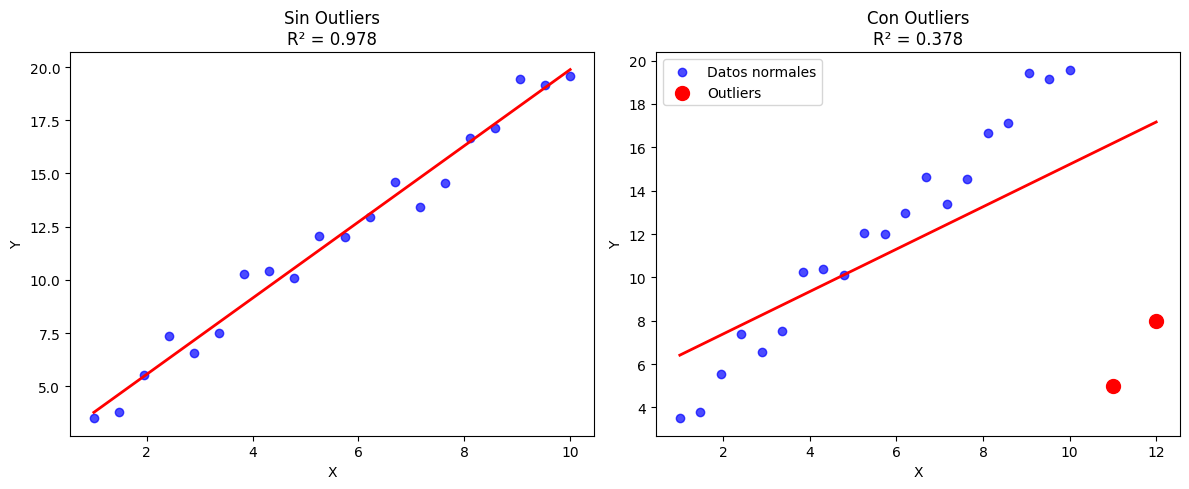

In [2]:
# Ejemplo: Impacto de outliers en regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Datos normales
np.random.seed(42)
x_normal = np.linspace(1, 10, 20)
y_normal = 2 * x_normal + 1 + np.random.normal(0, 1, 20)

# Añadir outliers
x_with_outlier = np.append(x_normal, [11, 12])
y_with_outlier = np.append(y_normal, [5, 8])  # Outliers

# Ajustar modelos
model_normal = LinearRegression().fit(x_normal.reshape(-1, 1), y_normal)
model_with_outlier = LinearRegression().fit(x_with_outlier.reshape(-1, 1), y_with_outlier)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_normal, y_normal, color='blue', alpha=0.7)
plt.plot(x_normal, model_normal.predict(x_normal.reshape(-1, 1)), color='red', linewidth=2)
plt.title(f'Sin Outliers\nR² = {r2_score(y_normal, model_normal.predict(x_normal.reshape(-1, 1))):.3f}')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 2, 2)
plt.scatter(x_normal, y_normal, color='blue', alpha=0.7, label='Datos normales')
plt.scatter([11, 12], [5, 8], color='red', s=100, label='Outliers')
plt.plot(x_with_outlier, model_with_outlier.predict(x_with_outlier.reshape(-1, 1)), color='red', linewidth=2)
plt.title(f'Con Outliers\nR² = {r2_score(y_with_outlier, model_with_outlier.predict(x_with_outlier.reshape(-1, 1))):.3f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

## Cuando los outliers son señales críticas, no ruido

En ciertos campos, los outliers no son problemas estadísticos sino señales vitales que salvan vidas o empresas:

### 🏦 **En finanzas**
Ese patrón extraño de transacciones podría ser la primera señal de un fraude masivo. Piensa en una cuenta que normalmente maneja 500€ al mes y de repente registra 50 transacciones de 1.000€ en un día.

### ❤️ **En salud**
Las lecturas anormales en un monitor cardíaco no son "ruido estadístico" - pueden significar una emergencia médica inminente.

### 🔒 **En ciberseguridad**
Un pico repentino en el tráfico de red suele ser la primera señal de un ataque que está comenzando.

### 🏭 **En control de calidad**
Las piezas que se desvían significativamente de las especificaciones a menudo indican fallos en la cadena de producción que deben corregirse inmediatamente.

En estos contextos, identificar correctamente los outliers puede marcar la diferencia entre detectar un problema crítico a tiempo o enfrentar consecuencias graves.

C:\Users\borja\AppData\Local\Temp\ipykernel_20028\2367248140.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([transacciones_normales, fraudes], labels=['Normales', 'Fraudes'])


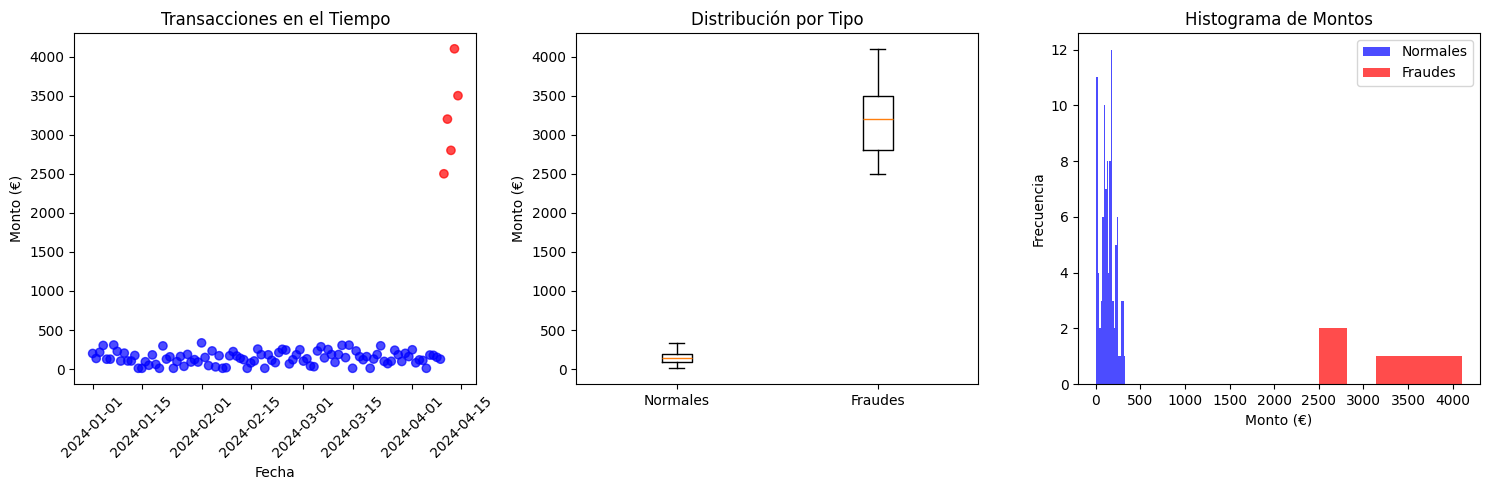

Transacciones normales - Media: 143.36€, Std: 83.15€
Fraudes - Media: 3220.00€, Std: 556.42€


In [3]:
# Ejemplo: Detección de anomalías en transacciones bancarias
np.random.seed(42)

# Simular transacciones normales (entre 10-500€)
transacciones_normales = np.random.normal(150, 100, 100)
transacciones_normales = np.clip(transacciones_normales, 10, 500)

# Añadir algunas transacciones fraudulentas
fraudes = [2500, 3200, 2800, 4100, 3500]
todas_transacciones = np.concatenate([transacciones_normales, fraudes])

# Crear fechas
fechas = pd.date_range('2024-01-01', periods=len(todas_transacciones), freq='D')
df_transacciones = pd.DataFrame({
    'fecha': fechas,
    'monto': todas_transacciones,
    'tipo': ['normal'] * len(transacciones_normales) + ['fraude'] * len(fraudes)
})

# Visualización
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
colors = ['blue' if x == 'normal' else 'red' for x in df_transacciones['tipo']]
plt.scatter(df_transacciones['fecha'], df_transacciones['monto'], c=colors, alpha=0.7)
plt.title('Transacciones en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Monto (€)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.boxplot([transacciones_normales, fraudes], labels=['Normales', 'Fraudes'])
plt.title('Distribución por Tipo')
plt.ylabel('Monto (€)')

plt.subplot(1, 3, 3)
plt.hist(transacciones_normales, bins=20, alpha=0.7, label='Normales', color='blue')
plt.hist(fraudes, bins=5, alpha=0.7, label='Fraudes', color='red')
plt.title('Histograma de Montos')
plt.xlabel('Monto (€)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

# Estadísticas
print(f"Transacciones normales - Media: {np.mean(transacciones_normales):.2f}€, Std: {np.std(transacciones_normales):.2f}€")
print(f"Fraudes - Media: {np.mean(fraudes):.2f}€, Std: {np.std(fraudes):.2f}€")

## Cómo los outliers afectan tus decisiones basadas en datos

Los outliers impactan directamente en cómo tomamos decisiones:

### 📊 **Sesgan tus conclusiones**
Tu empresa podría sobreestimar drásticamente sus ingresos medios si incluye ventas extraordinarias que no volverán a ocurrir.

### 🚨 **Generan falsas alertas o peligrosa complacencia**
Un sistema mal calibrado para outliers puede volverse el cuento de "Pedro y el lobo" digital: o genera tantas falsas alarmas que acabas ignorándolas todas, o no detecta anomalías reales.

### 💰 **Distorsionan tu asignación de recursos**
Si basas tu presupuesto en datos que incluyen valores atípicos sin contextualizarlos, acabarás destinando recursos de forma ineficiente.

### 🔍 **Ocultan oportunidades valiosas**
A veces, lo que parece un outlier es en realidad el primer indicio de una tendencia emergente. Las empresas que identifican estos patrones temprano obtienen ventajas competitivas enormes.

## Los diferentes tipos de outliers y cómo detectarlos

### Outliers univariados vs. multivariados

No todos los outliers son iguales. Según las dimensiones que analizamos, encontramos:

#### **Outliers univariados**
Son como la persona extremadamente alta en una clase - destacan en una sola variable y son relativamente fáciles de identificar.

**Por ejemplo**: En un dataset de alturas, alguien que mida 2,20m sobresaldría claramente como un outlier univariado.

#### **Outliers multivariados**
Son mucho más traicioneros porque no destacan en ninguna dimensión individual, pero su combinación de valores resulta inusual.

Imagina a alguien que mide 1,80m y pesa 65kg. Ninguno de estos valores es extremo por separado, pero esta combinación puede ser atípica si la mayoría de personas con esa altura tienen un peso considerablemente mayor.

La detección de outliers multivariados es significativamente más compleja y requiere técnicas especializadas como la distancia de Mahalanobis o análisis de componentes principales.

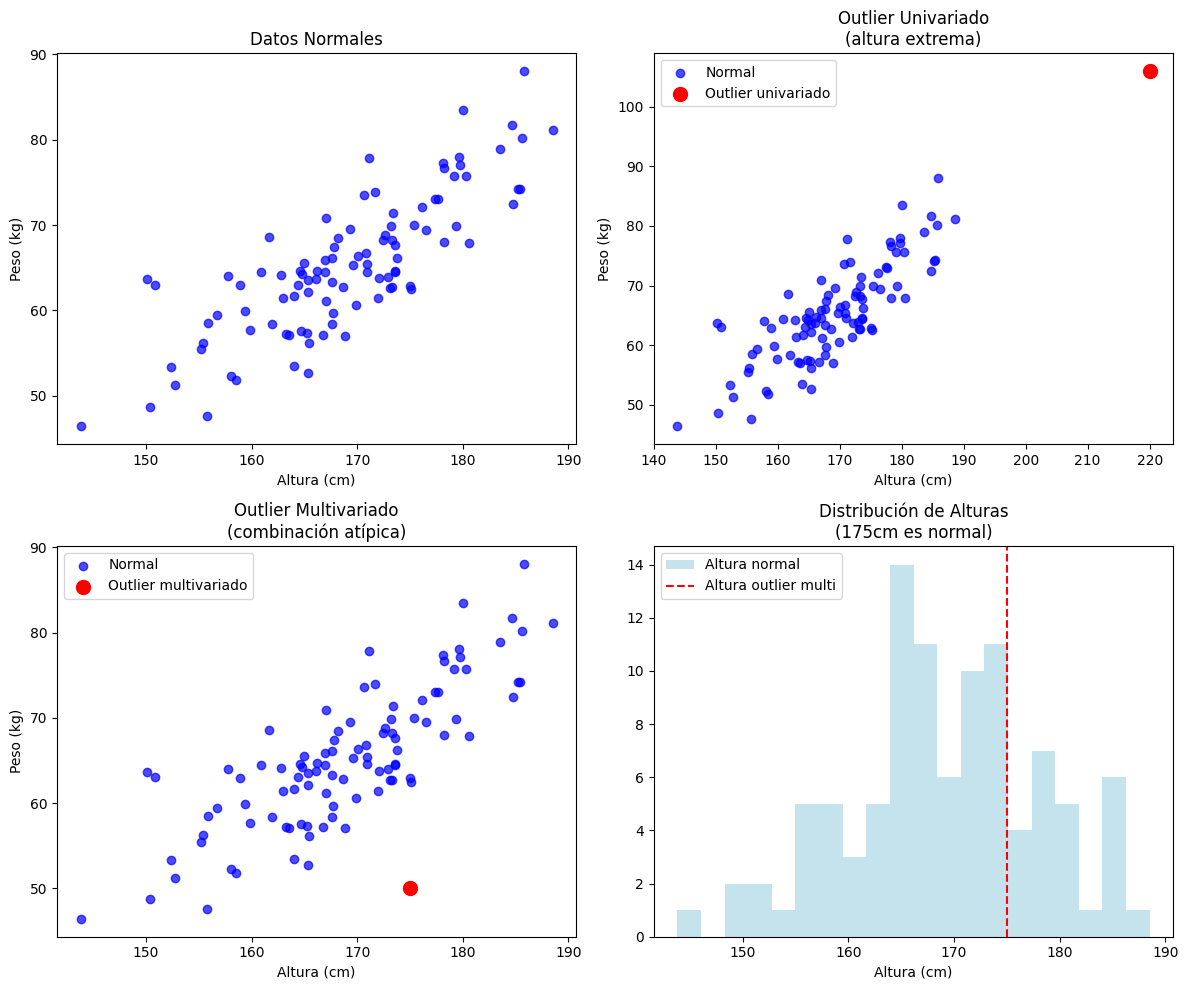

Outlier univariado: Altura extrema (220cm) fácil de detectar
Outlier multivariado: Altura normal (175cm) + Peso bajo (50kg) = Combinación atípica


In [4]:
# Ejemplo: Outliers univariados vs multivariados
from scipy.spatial.distance import mahalanobis

np.random.seed(42)

# Generar datos normales: altura y peso correlacionados
altura = np.random.normal(170, 10, 100)  # cm
peso = 0.8 * altura - 70 + np.random.normal(0, 5, 100)  # kg

# Outlier univariado: altura muy alta pero peso normal para esa altura
altura_outlier_uni = np.append(altura, 220)  # Muy alto
peso_outlier_uni = np.append(peso, 0.8 * 220 - 70)  # Peso normal para esa altura

# Outlier multivariado: altura y peso individualmente normales pero combinación atípica
altura_outlier_multi = np.append(altura, 175)  # Altura normal
peso_outlier_multi = np.append(peso, 50)  # Peso muy bajo para esa altura

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Datos normales
axes[0,0].scatter(altura, peso, alpha=0.7, color='blue')
axes[0,0].set_title('Datos Normales')
axes[0,0].set_xlabel('Altura (cm)')
axes[0,0].set_ylabel('Peso (kg)')

# Con outlier univariado
axes[0,1].scatter(altura, peso, alpha=0.7, color='blue', label='Normal')
axes[0,1].scatter([220], [0.8 * 220 - 70], color='red', s=100, label='Outlier univariado')
axes[0,1].set_title('Outlier Univariado\n(altura extrema)')
axes[0,1].set_xlabel('Altura (cm)')
axes[0,1].set_ylabel('Peso (kg)')
axes[0,1].legend()

# Con outlier multivariado
axes[1,0].scatter(altura, peso, alpha=0.7, color='blue', label='Normal')
axes[1,0].scatter([175], [50], color='red', s=100, label='Outlier multivariado')
axes[1,0].set_title('Outlier Multivariado\n(combinación atípica)')
axes[1,0].set_xlabel('Altura (cm)')
axes[1,0].set_ylabel('Peso (kg)')
axes[1,0].legend()

# Histogramas para mostrar que individualmente no es outlier
axes[1,1].hist(altura, bins=20, alpha=0.7, label='Altura normal', color='lightblue')
axes[1,1].axvline(175, color='red', linestyle='--', label='Altura outlier multi')
axes[1,1].set_title('Distribución de Alturas\n(175cm es normal)')
axes[1,1].set_xlabel('Altura (cm)')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print("Outlier univariado: Altura extrema (220cm) fácil de detectar")
print("Outlier multivariado: Altura normal (175cm) + Peso bajo (50kg) = Combinación atípica")

### Outliers según su contexto y agrupación

Dependiendo de cómo se relacionen con el resto de tus datos, puedes encontrarte con:

#### **Outliers globales**
Son valores extremos respecto a todo tu conjunto de datos. Una temperatura de -50°C en Finlandia sería un outlier global en cualquier análisis climático que realices.

#### **Outliers contextuales**
Solo resultan anómalos en un contexto específico. Un gasto de 200€ en café no es raro durante un mes, pero si ocurre en un solo día, se convierte en un outlier contextual.

#### **Outliers de agrupación**
Aparecen cuando tus datos forman grupos naturales. Una persona de 40 años en una clase universitaria de primer año sería un outlier de este tipo, aunque esa edad no sea extrema en la población general.

Identificar correctamente la categoría te ayudará a elegir la mejor estrategia para gestionarlos.

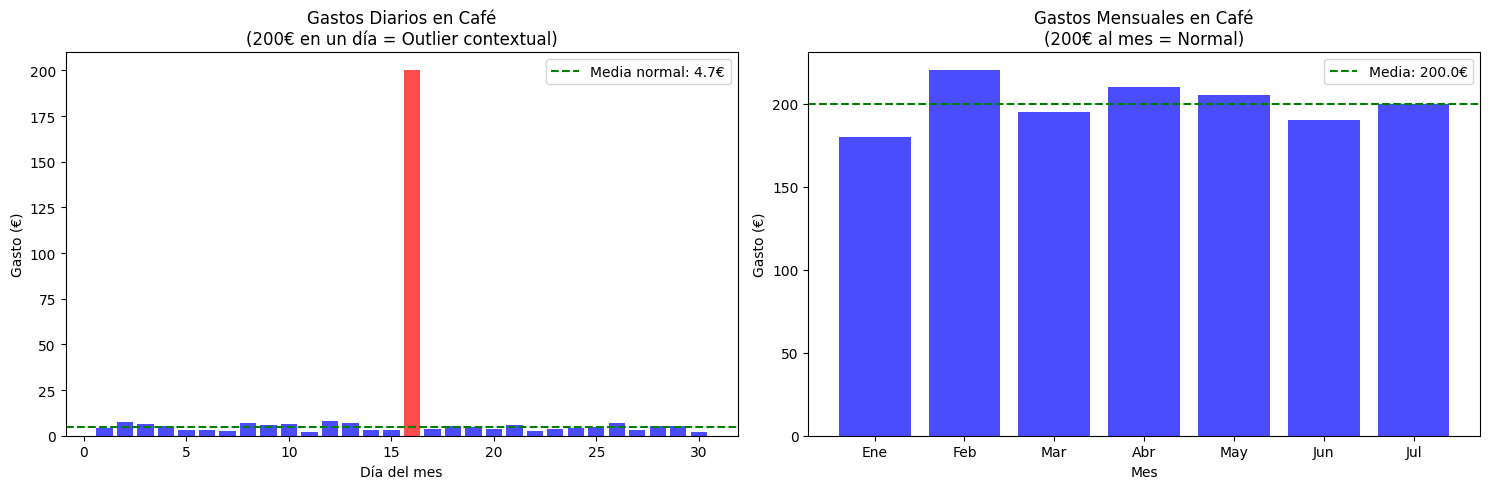


📊 Análisis contextual:
• 200€ en un DÍA: Outlier (vs media diaria de 4.7€)
• 200€ en un MES: Normal (vs media mensual de 200.0€)

💡 El CONTEXTO determina si un valor es atípico o no


In [5]:
# Ejemplo: Outliers contextuales - Gastos por día vs mes
np.random.seed(42)

# Simular gastos diarios normales en café (2-8€)
dias = range(1, 31)
gastos_cafe_diarios = np.random.uniform(2, 8, 30)

# Un día con gasto extremo (200€ - quizás compró para toda la oficina)
gastos_cafe_diarios[15] = 200

# Gastos mensuales totales (normal que sea 200€ al mes)
gastos_mensuales = [180, 220, 195, 210, 205, 190, 200]  # Normal
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gastos diarios - 200€ es outlier contextual
colors = ['red' if x > 50 else 'blue' for x in gastos_cafe_diarios]
axes[0].bar(dias, gastos_cafe_diarios, color=colors, alpha=0.7)
axes[0].set_title('Gastos Diarios en Café\n(200€ en un día = Outlier contextual)')
axes[0].set_xlabel('Día del mes')
axes[0].set_ylabel('Gasto (€)')
axes[0].axhline(y=np.mean(gastos_cafe_diarios[gastos_cafe_diarios < 50]), 
               color='green', linestyle='--', label=f'Media normal: {np.mean(gastos_cafe_diarios[gastos_cafe_diarios < 50]):.1f}€')
axes[0].legend()

# Gastos mensuales - 200€ es normal
axes[1].bar(meses, gastos_mensuales, color='blue', alpha=0.7)
axes[1].set_title('Gastos Mensuales en Café\n(200€ al mes = Normal)')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Gasto (€)')
axes[1].axhline(y=np.mean(gastos_mensuales), 
               color='green', linestyle='--', label=f'Media: {np.mean(gastos_mensuales):.1f}€')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n📊 Análisis contextual:")
print(f"• 200€ en un DÍA: Outlier (vs media diaria de {np.mean(gastos_cafe_diarios[gastos_cafe_diarios < 50]):.1f}€)")
print(f"• 200€ en un MES: Normal (vs media mensual de {np.mean(gastos_mensuales):.1f}€)")
print("\n💡 El CONTEXTO determina si un valor es atípico o no")

## Visualizaciones que revelan outliers instantáneamente

A veces, una imagen vale más que mil cálculos estadísticos:

### 📦 **Boxplots**
Son como radiografías para tus datos - muestran claramente el IQR y marcan los outliers con puntos individuales fuera de los "bigotes". Si necesitas detectar rápidamente valores atípicos en variables numéricas, esta es tu herramienta.

### 📈 **Scatter plots**
Perfectos para identificar outliers multivariados, ya que muestran la relación entre dos variables y permiten detectar puntos que rompen el patrón general.

### 📊 **Histogramas**
Te permiten visualizar la distribución completa de tus datos. Los outliers aparecerán como barras aisladas lejos del grueso de la distribución.

Combina estas visualizaciones para obtener una comprensión más profunda. Un histograma puede mostrarte la distribución general, mientras que un boxplot te señalará específicamente los valores atípicos.

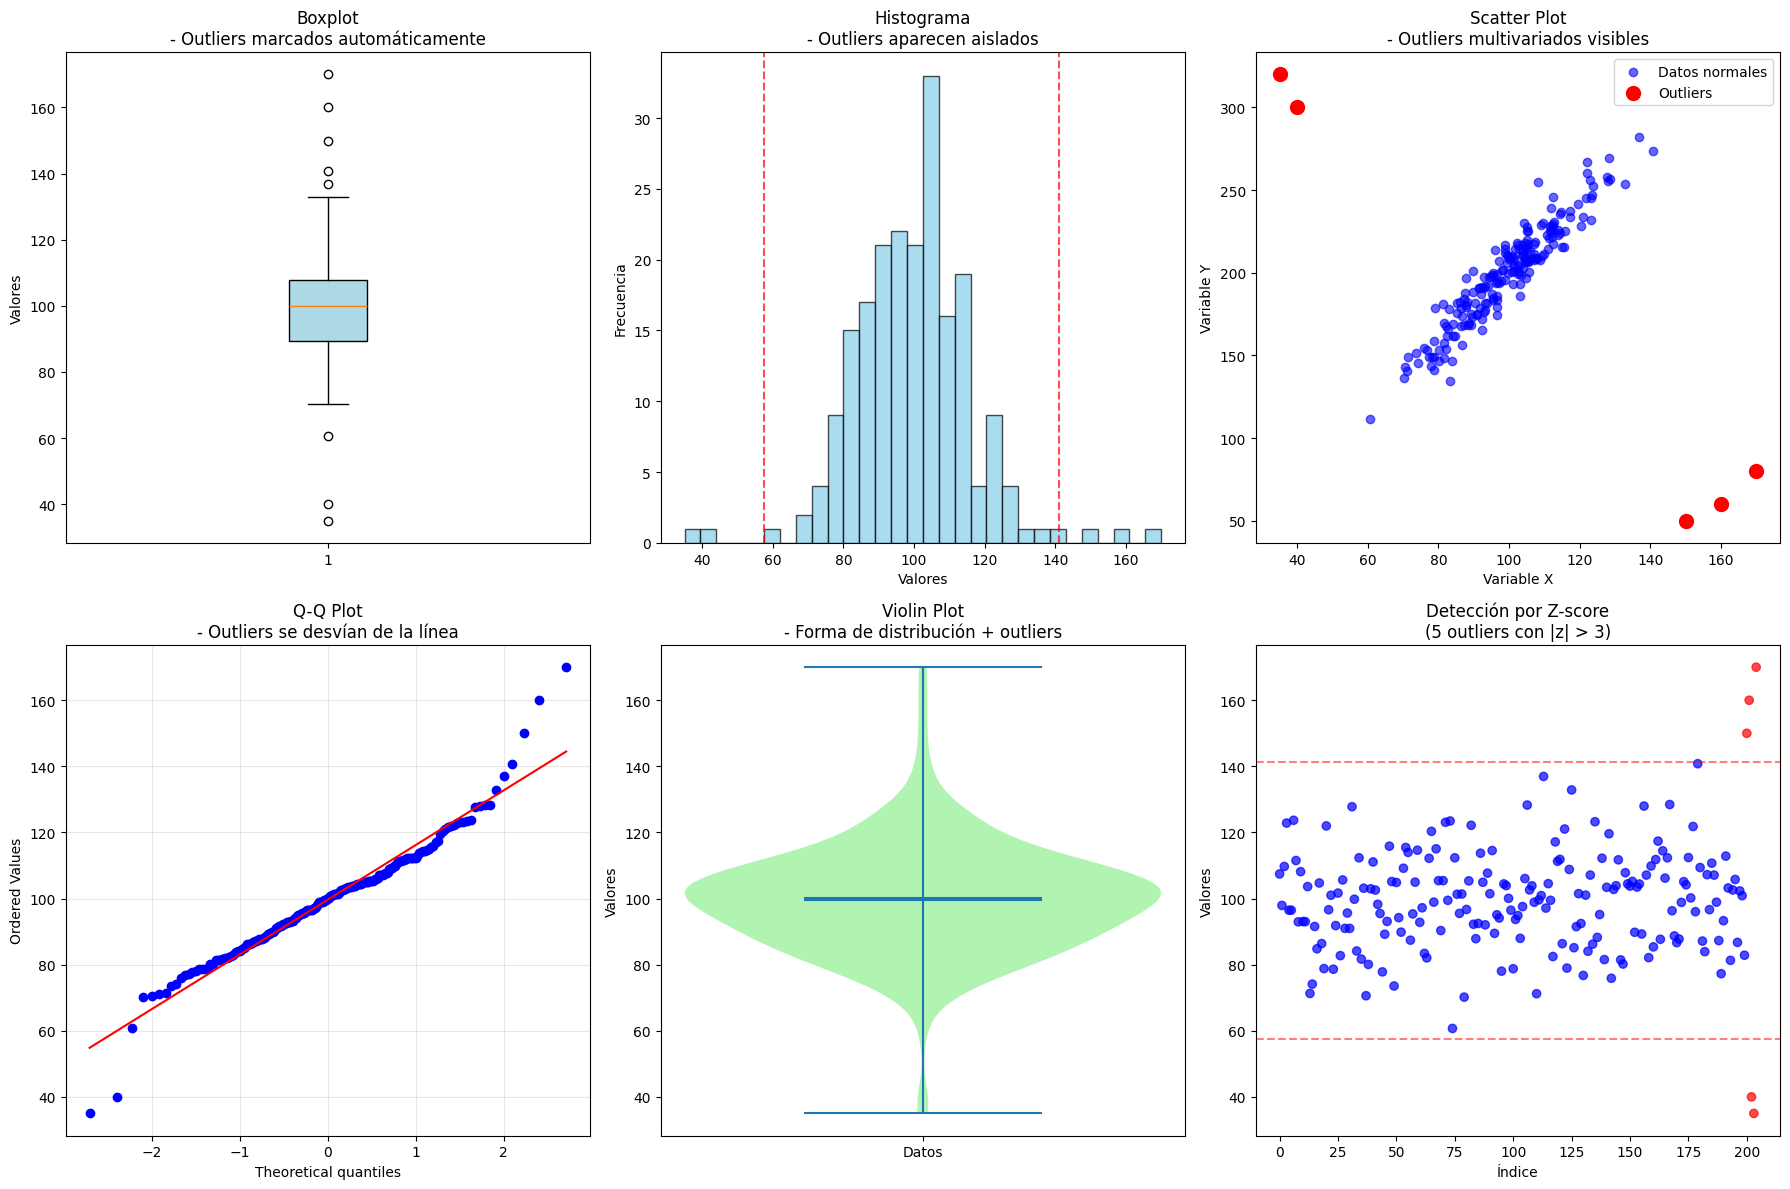

🎯 Resumen de métodos de detección visual:
• Boxplot: Identifica 8 outliers
• Z-score: Identifica 5 outliers (|z| > 3)
• Scatter: Revela patrones multivariados
• Combinando métodos obtienes una visión completa


In [6]:
# Demostración completa de métodos de detección visual
np.random.seed(42)

# Crear dataset con outliers conocidos
data_normal = np.random.normal(100, 15, 200)
outliers = [150, 160, 40, 35, 170]
data_completa = np.concatenate([data_normal, outliers])

# Crear segunda variable para scatter plot
y_normal = 2 * data_normal + np.random.normal(0, 10, 200)
y_outliers = [50, 60, 300, 320, 80]  # Outliers multivariados
y_completa = np.concatenate([y_normal, y_outliers])

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Boxplot - Detección univariada
bp = axes[0,0].boxplot(data_completa, patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0,0].set_title('Boxplot\n- Outliers marcados automáticamente')
axes[0,0].set_ylabel('Valores')

# 2. Histograma - Distribución general
axes[0,1].hist(data_completa, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,1].set_title('Histograma\n- Outliers aparecen aislados')
axes[0,1].set_xlabel('Valores')
axes[0,1].set_ylabel('Frecuencia')
# Marcar zona de outliers
axes[0,1].axvline(data_normal.mean() + 3*data_normal.std(), color='red', linestyle='--', alpha=0.7)
axes[0,1].axvline(data_normal.mean() - 3*data_normal.std(), color='red', linestyle='--', alpha=0.7)

# 3. Scatter Plot - Outliers multivariados
# Separar datos normales de outliers para colores
axes[0,2].scatter(data_normal, y_normal, alpha=0.6, color='blue', label='Datos normales')
axes[0,2].scatter(outliers, y_outliers, color='red', s=100, label='Outliers')
axes[0,2].set_title('Scatter Plot\n- Outliers multivariados visibles')
axes[0,2].set_xlabel('Variable X')
axes[0,2].set_ylabel('Variable Y')
axes[0,2].legend()

# 4. Q-Q Plot - Normalidad y outliers
from scipy.stats import probplot
probplot(data_completa, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot\n- Outliers se desvían de la línea')
axes[1,0].grid(True, alpha=0.3)

# 5. Violin Plot - Distribución detallada
parts = axes[1,1].violinplot([data_completa], positions=[1], showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_alpha(0.7)
axes[1,1].set_title('Violin Plot\n- Forma de distribución + outliers')
axes[1,1].set_ylabel('Valores')
axes[1,1].set_xticks([1])
axes[1,1].set_xticklabels(['Datos'])

# 6. Detección estadística (Z-score)
z_scores = np.abs(stats.zscore(data_completa))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]

colors = ['red' if i in outlier_indices else 'blue' for i in range(len(data_completa))]
axes[1,2].scatter(range(len(data_completa)), data_completa, c=colors, alpha=0.7)
axes[1,2].set_title(f'Detección por Z-score\n({len(outlier_indices)} outliers con |z| > {threshold})')
axes[1,2].set_xlabel('Índice')
axes[1,2].set_ylabel('Valores')
axes[1,2].axhline(y=data_normal.mean() + 3*data_normal.std(), color='red', linestyle='--', alpha=0.5)
axes[1,2].axhline(y=data_normal.mean() - 3*data_normal.std(), color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print("🎯 Resumen de métodos de detección visual:")
print(f"• Boxplot: Identifica {len([x for x in data_completa if x > np.percentile(data_completa, 75) + 1.5*(np.percentile(data_completa, 75) - np.percentile(data_completa, 25)) or x < np.percentile(data_completa, 25) - 1.5*(np.percentile(data_completa, 75) - np.percentile(data_completa, 25))])} outliers")
print(f"• Z-score: Identifica {len(outlier_indices)} outliers (|z| > 3)")
print(f"• Scatter: Revela patrones multivariados")
print(f"• Combinando métodos obtienes una visión completa")

## Estrategias prácticas para manejar los outliers en tus proyectos

### Transformación de datos para dominar los outliers

Otras estrategias buscan modificar los outliers o cambiar la estructura de tus datos:

#### **Imputación**
Reemplazas los valores atípicos por estimaciones más razonables:
- Media o mediana de la variable
- Valores predichos mediante regresión
- Métodos de imputación múltiple

#### **Transformaciones**
Cambias la escala de tus datos para reducir el impacto de los valores extremos:
- **Logarítmica**: ideal para datos con asimetría positiva pronunciada
- **Raíz cuadrada**: cuando necesitas algo menos drástico que la logarítmica
- **Box-Cox**: una familia de transformaciones que busca normalizar tus datos

Estas técnicas son particularmente útiles cuando no estás seguro de si tus outliers son errores o representan fenómenos reales que no quieres perder completamente.

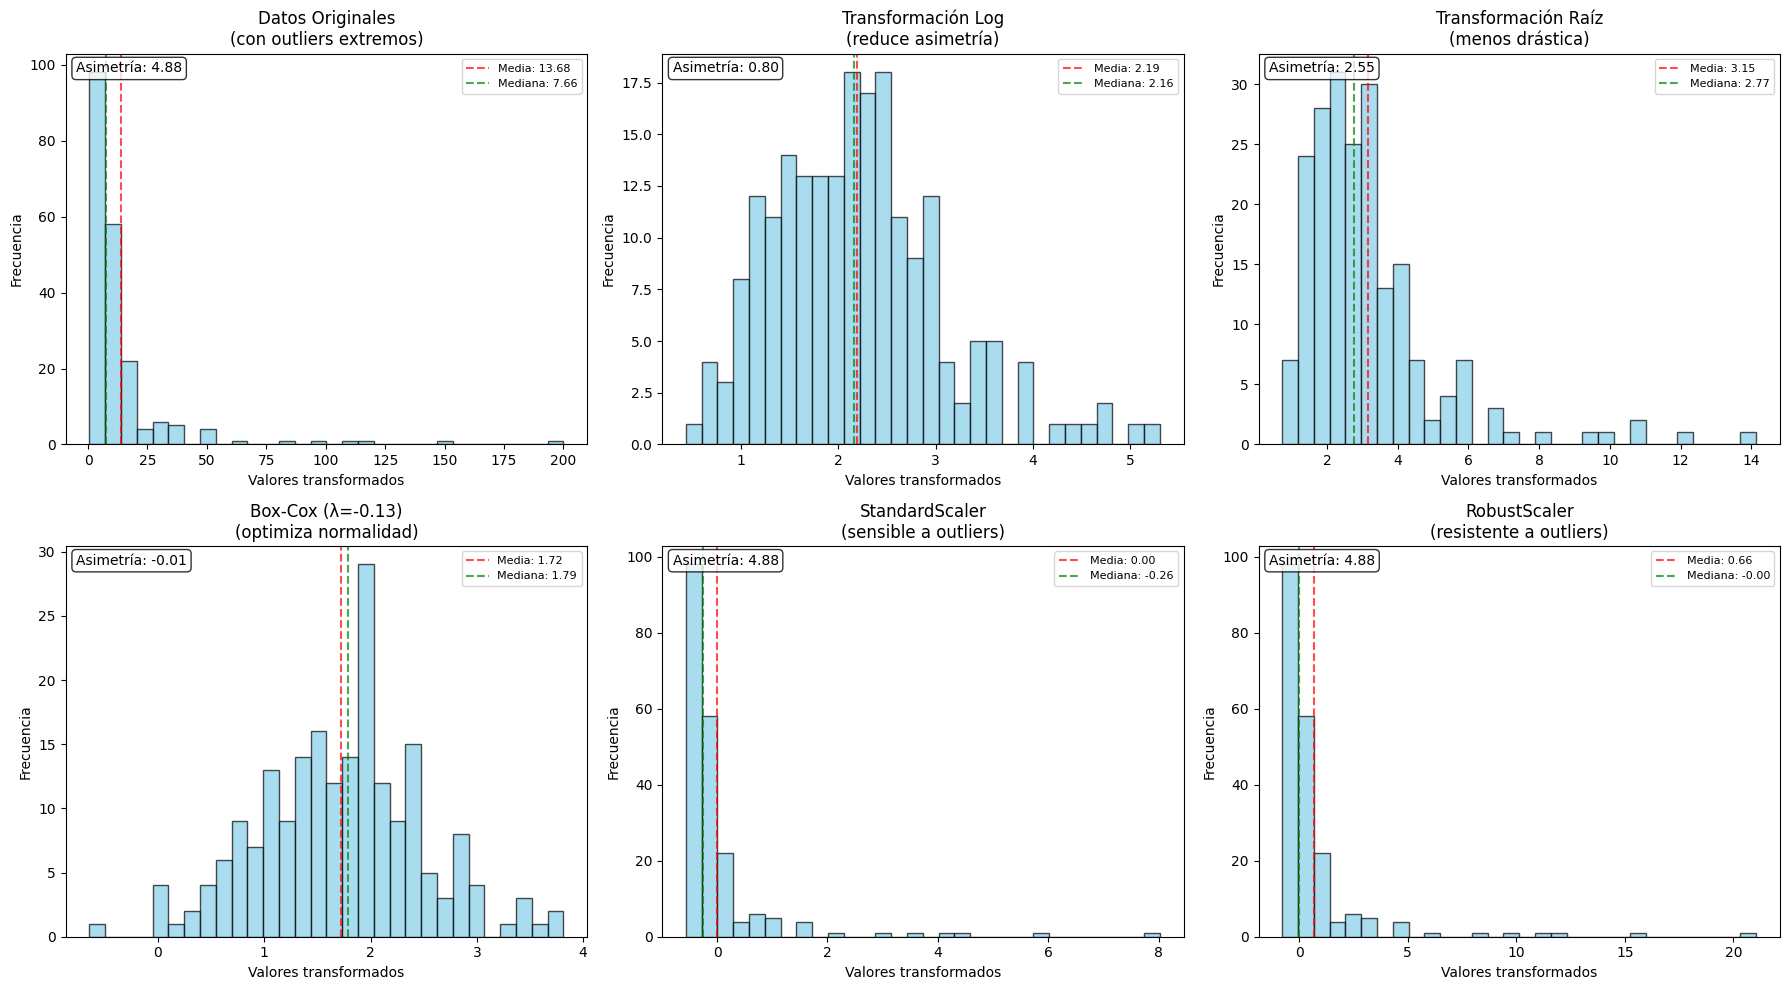

📊 Resultados de las transformaciones:
• Original: Asimetría = 4.88 (muy asimétrica)
• Log: Asimetría = 0.80 (más simétrica)
• Sqrt: Asimetría = 2.55 (intermedia)
• Box-Cox: Asimetría = -0.01 (optimizada)

🎯 RobustScaler vs StandardScaler:
• Standard: Muy afectado por outliers
• Robust: Usa mediana e IQR, más resistente


In [7]:
# Demostración de técnicas de transformación para outliers
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, RobustScaler

np.random.seed(42)

# Crear datos con outliers y asimetría
data_base = np.random.lognormal(2, 1, 200)  # Distribución log-normal (asimétrica)
outliers_extremos = [100, 120, 150, 200]  # Outliers muy extremos
data_original = np.concatenate([data_base, outliers_extremos])

# Aplicar diferentes transformaciones
data_log = np.log1p(data_original)  # log(1+x) para evitar log(0)
data_sqrt = np.sqrt(data_original)
data_boxcox, lambda_param = boxcox(data_original)  # Box-Cox automática

# Técnicas de escalado robustas
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()  # Usa mediana y IQR, más resistente a outliers

data_standard = scaler_standard.fit_transform(data_original.reshape(-1, 1)).flatten()
data_robust = scaler_robust.fit_transform(data_original.reshape(-1, 1)).flatten()

# Visualización comparativa
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

datasets = [
    (data_original, 'Datos Originales\n(con outliers extremos)'),
    (data_log, 'Transformación Log\n(reduce asimetría)'),
    (data_sqrt, 'Transformación Raíz\n(menos drástica)'),
    (data_boxcox, f'Box-Cox (λ={lambda_param:.2f})\n(optimiza normalidad)'),
    (data_standard, 'StandardScaler\n(sensible a outliers)'),
    (data_robust, 'RobustScaler\n(resistente a outliers)')
]

for i, (data, title) in enumerate(datasets):
    row, col = i // 3, i % 3
    
    # Histograma
    axes[row, col].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('Valores transformados')
    axes[row, col].set_ylabel('Frecuencia')
    
    # Añadir estadísticas
    mean_val = np.mean(data)
    median_val = np.median(data)
    axes[row, col].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Media: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Mediana: {median_val:.2f}')
    axes[row, col].legend(fontsize=8)
    
    # Calcular skewness
    skewness = stats.skew(data)
    axes[row, col].text(0.02, 0.98, f'Asimetría: {skewness:.2f}', 
                       transform=axes[row, col].transAxes, 
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("📊 Resultados de las transformaciones:")
print(f"• Original: Asimetría = {stats.skew(data_original):.2f} (muy asimétrica)")
print(f"• Log: Asimetría = {stats.skew(data_log):.2f} (más simétrica)")
print(f"• Sqrt: Asimetría = {stats.skew(data_sqrt):.2f} (intermedia)")
print(f"• Box-Cox: Asimetría = {stats.skew(data_boxcox):.2f} (optimizada)")
print(f"\n🎯 RobustScaler vs StandardScaler:")
print(f"• Standard: Muy afectado por outliers")
print(f"• Robust: Usa mediana e IQR, más resistente")

### Modelos que resisten naturalmente a los outliers

Otra opción es utilizar métodos diseñados específicamente para ser resistentes a outliers:

#### **Modelos estadísticos robustos**
Como la regresión robusta, que asigna automáticamente menos peso a observaciones atípicas.

#### **Algoritmos naturalmente resistentes a outliers:**
- **Random Forest**: gracias a su naturaleza de ensamblado, es bastante inmune a valores atípicos
- **DBSCAN**: un algoritmo de clustering que identifica outliers como parte de su funcionamiento normal
- **Support Vector Machines**: puede configurarse para ser menos sensible a puntos extremos

La ventaja de estos métodos es que no requieren que identifiques explícitamente los outliers antes de aplicarlos, lo que es especialmente útil cuando trabajas con datos complejos o multidimensionales.

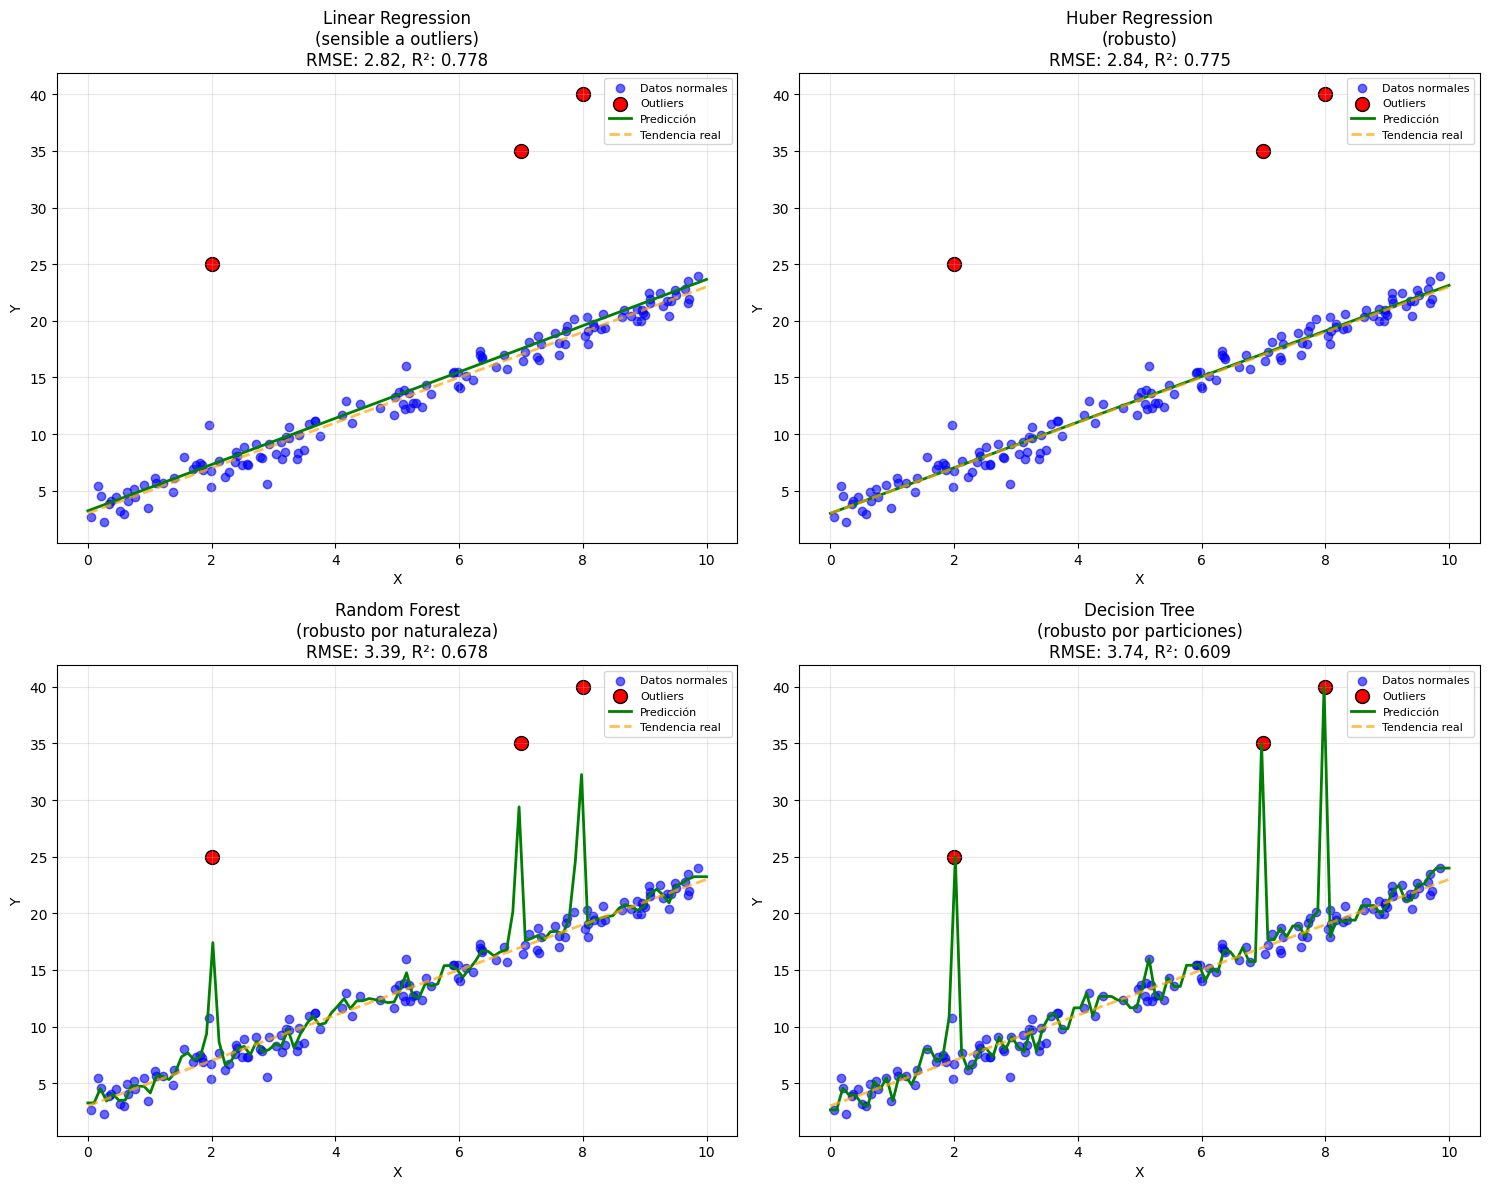

🎯 Comparación de robustez a outliers:

Linear Regression........ RMSE: 2.82, R²: 0.778
Huber Regression......... RMSE: 2.84, R²: 0.775
Random Forest............ RMSE: 3.39, R²: 0.678
Decision Tree............ RMSE: 3.74, R²: 0.609

💡 Observaciones:
• Linear Regression: Muy afectada por outliers, línea sesgada
• Huber Regression: Menos peso a outliers, más robusta
• Random Forest: Naturally robust debido a múltiples árboles
• Decision Tree: Particiones locales minimizan impacto global


In [8]:
# Comparación de modelos robustos vs sensibles a outliers
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Crear dataset con relación clara + outliers
X_clean = np.random.uniform(0, 10, 200).reshape(-1, 1)
y_clean = 2 * X_clean.flatten() + 3 + np.random.normal(0, 1, 200)

# Añadir outliers extremos
X_outliers = np.array([[2], [3], [7], [8]])
y_outliers = np.array([25, 30, 35, 40])  # Muy lejos de la tendencia real

X_with_outliers = np.vstack([X_clean, X_outliers])
y_with_outliers = np.concatenate([y_clean, y_outliers])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_with_outliers, y_with_outliers, test_size=0.3, random_state=42)

# Definir modelos
models = {
    'Linear Regression\n(sensible a outliers)': LinearRegression(),
    'Huber Regression\n(robusto)': HuberRegressor(),
    'Random Forest\n(robusto por naturaleza)': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree\n(robusto por particiones)': DecisionTreeRegressor(random_state=42, max_depth=10)
}

# Entrenar y evaluar modelos
results = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    predictions[name] = y_pred

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

for i, (name, model) in enumerate(models.items()):
    # Datos de entrenamiento
    is_outlier = np.isin(X_train.flatten(), X_outliers.flatten())
    axes[i].scatter(X_train[~is_outlier], y_train[~is_outlier], alpha=0.6, color='blue', label='Datos normales')
    axes[i].scatter(X_train[is_outlier], y_train[is_outlier], color='red', s=100, label='Outliers', edgecolors='black')
    
    # Predicciones del modelo
    y_plot = model.predict(X_plot)
    axes[i].plot(X_plot, y_plot, color='green', linewidth=2, label='Predicción')
    
    # Línea teórica real (sin outliers)
    y_true = 2 * X_plot.flatten() + 3
    axes[i].plot(X_plot, y_true, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Tendencia real')
    
    axes[i].set_title(f'{name}\nRMSE: {results[name]["RMSE"]:.2f}, R²: {results[name]["R²"]:.3f}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de resultados
print("🎯 Comparación de robustez a outliers:")
print("\n" + "="*50)
for name, metrics in results.items():
    print(f"{name.split()[0] + ' ' + name.split()[1]:.<25} RMSE: {metrics['RMSE']:.2f}, R²: {metrics['R²']:.3f}")

print("\n💡 Observaciones:")
print("• Linear Regression: Muy afectada por outliers, línea sesgada")
print("• Huber Regression: Menos peso a outliers, más robusta")
print("• Random Forest: Naturally robust debido a múltiples árboles")
print("• Decision Tree: Particiones locales minimizan impacto global")

### ¿Mantener o eliminar? Evaluación del impacto real

Antes de decidir qué hacer con tus outliers, evalúa su impacto real:

#### **Análisis de sensibilidad**
Compara tus resultados con y sin outliers para entender exactamente cómo afectan a tus conclusiones.

#### **Validación cruzada**
Evalúa el rendimiento de tus modelos con diferentes estrategias de tratamiento de outliers.

#### **Pruebas de estabilidad**
Verifica si tus resultados se mantienen consistentes cuando aplicas diferentes umbrales para identificar valores atípicos.

Por ejemplo, prueba a entrenar un modelo de regresión con y sin outliers, y compara sus métricas de rendimiento (como RMSE o R²) para determinar la mejor estrategia para tu caso específico.

**Recuerda**: no existe una solución única. La decisión debe basarse en el contexto específico de tu análisis y en los objetivos que persigues.

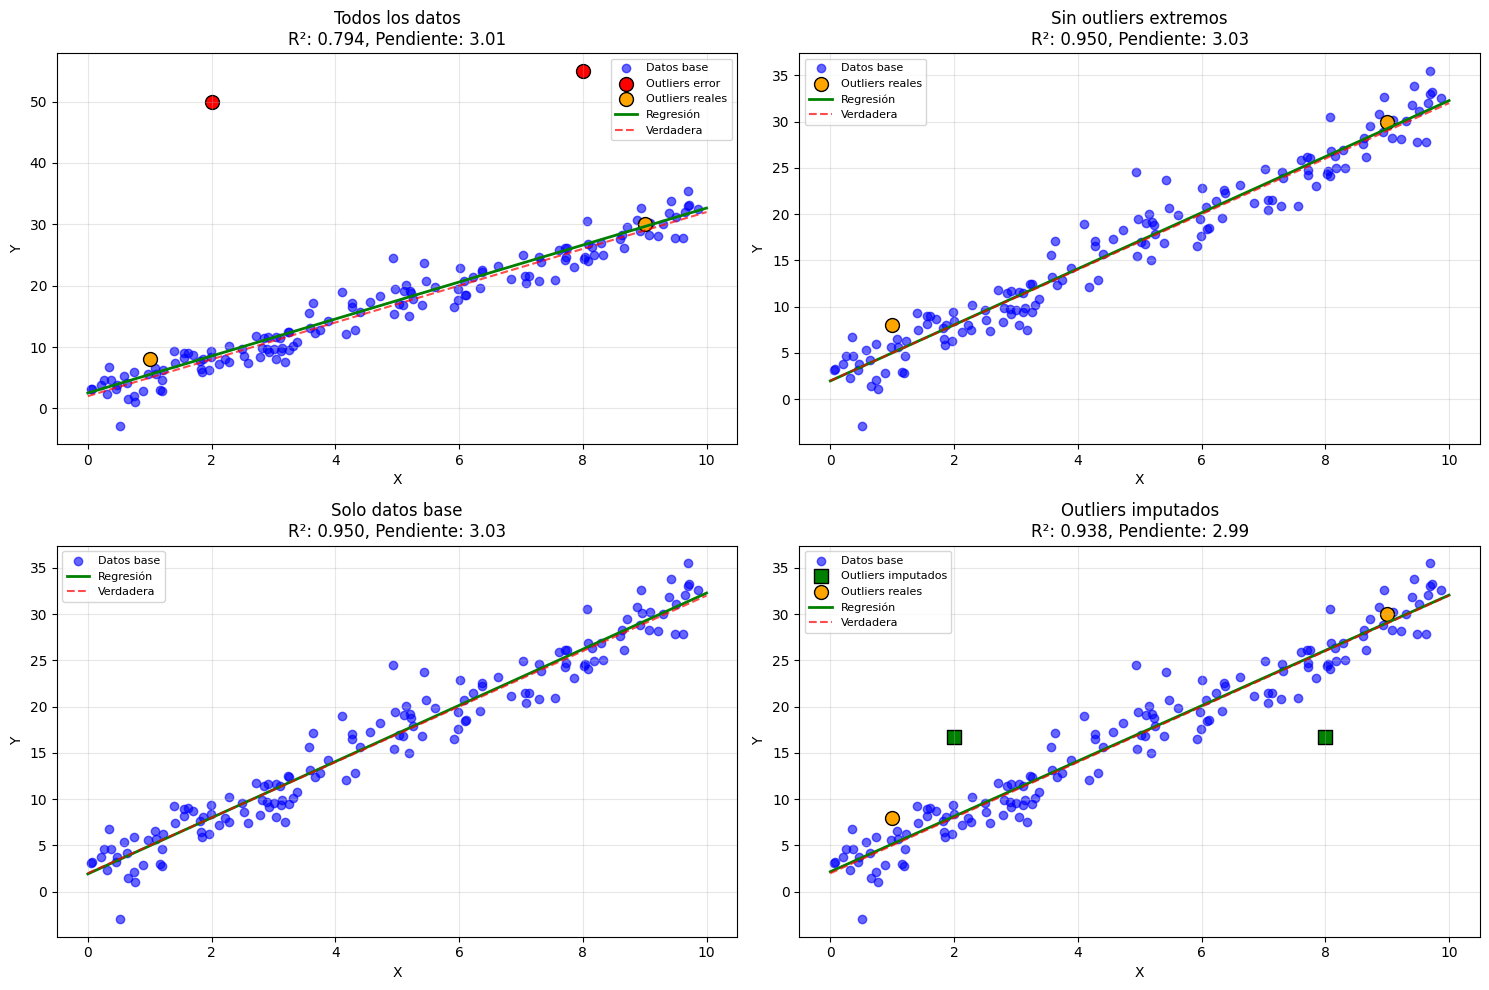

📊 Análisis de sensibilidad - Comparación de estrategias:

Estrategia           R²       MSE      MAE      Pendiente  Intercepto
Todos los datos      0.794    20.8     2.08     3.01       2.51      
Sin outliers extremos 0.950    4.2      1.64     3.03       1.98      
Solo datos base      0.950    4.2      1.64     3.03       1.93      
Outliers imputados   0.938    5.2      1.73     2.99       2.17      

💡 Conclusiones del análisis de sensibilidad:
• La pendiente verdadera es 3.0, el intercepto verdadero es 2.0
• 'Sin outliers extremos' se acerca más a los parámetros reales
• La imputación es un compromiso entre preservar datos y reducir sesgo
• La decisión depende del contexto y objetivos específicos


In [9]:
# Análisis de sensibilidad: impacto de diferentes estrategias
from sklearn.metrics import mean_absolute_error

np.random.seed(42)

# Crear dataset base
X_base = np.random.uniform(0, 10, 150).reshape(-1, 1)
y_base = 3 * X_base.flatten() + 2 + np.random.normal(0, 2, 150)

# Añadir diferentes tipos de outliers
X_outliers_error = np.array([[2], [8]])  # Posibles errores de medición
y_outliers_error = np.array([50, 55])    # Muy lejos de la tendencia

X_outliers_real = np.array([[1], [9]])   # Posibles valores reales extremos
y_outliers_real = np.array([8, 30])     # Extremos pero en la tendencia

# Combinar datos
X_all = np.vstack([X_base, X_outliers_error, X_outliers_real])
y_all = np.concatenate([y_base, y_outliers_error, y_outliers_real])

# Estrategias diferentes
strategies = {
    'Todos los datos': (X_all, y_all),
    'Sin outliers extremos': (np.vstack([X_base, X_outliers_real]), 
                             np.concatenate([y_base, y_outliers_real])),
    'Solo datos base': (X_base, y_base),
    'Outliers imputados': (X_all, None)  # Será procesado después
}

# Para outliers imputados, reemplazar valores extremos por mediana
y_imputado = y_all.copy()
threshold_z = 3
z_scores = np.abs(stats.zscore(y_all))
outlier_mask = z_scores > threshold_z
y_imputado[outlier_mask] = np.median(y_all[~outlier_mask])
strategies['Outliers imputados'] = (X_all, y_imputado)

# Evaluar cada estrategia
results_comparison = {}
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

for i, (strategy_name, (X_data, y_data)) in enumerate(strategies.items()):
    # Entrenar modelo
    model = LinearRegression()
    model.fit(X_data, y_data)
    
    # Predecir
    y_pred_plot = model.predict(X_plot)
    y_pred_data = model.predict(X_data)
    
    # Métricas
    mse = mean_squared_error(y_data, y_pred_data)
    r2 = r2_score(y_data, y_pred_data)
    mae = mean_absolute_error(y_data, y_pred_data)
    
    results_comparison[strategy_name] = {
        'MSE': mse,
        'R²': r2,
        'MAE': mae,
        'Pendiente': model.coef_[0],
        'Intercepto': model.intercept_
    }
    
    # Visualizar
    axes[i].scatter(X_base, y_base, alpha=0.6, color='blue', label='Datos base')
    
    if strategy_name == 'Todos los datos':
        axes[i].scatter(X_outliers_error, y_outliers_error, color='red', s=100, 
                       label='Outliers error', edgecolors='black')
        axes[i].scatter(X_outliers_real, y_outliers_real, color='orange', s=100, 
                       label='Outliers reales', edgecolors='black')
    elif strategy_name == 'Sin outliers extremos':
        axes[i].scatter(X_outliers_real, y_outliers_real, color='orange', s=100, 
                       label='Outliers reales', edgecolors='black')
    elif strategy_name == 'Outliers imputados':
        axes[i].scatter(X_outliers_error, [np.median(y_base)]*2, color='green', s=100, 
                       label='Outliers imputados', marker='s', edgecolors='black')
        axes[i].scatter(X_outliers_real, y_outliers_real, color='orange', s=100, 
                       label='Outliers reales', edgecolors='black')
    
    axes[i].plot(X_plot, y_pred_plot, color='green', linewidth=2, label='Regresión')
    
    # Línea verdadera
    y_true = 3 * X_plot.flatten() + 2
    axes[i].plot(X_plot, y_true, color='red', linestyle='--', alpha=0.7, label='Verdadera')
    
    axes[i].set_title(f'{strategy_name}\nR²: {r2:.3f}, Pendiente: {model.coef_[0]:.2f}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla comparativa
print("📊 Análisis de sensibilidad - Comparación de estrategias:")
print("\n" + "="*80)
print(f"{'Estrategia':<20} {'R²':<8} {'MSE':<8} {'MAE':<8} {'Pendiente':<10} {'Intercepto':<10}")
print("="*80)

for strategy, metrics in results_comparison.items():
    print(f"{strategy:<20} {metrics['R²']:<8.3f} {metrics['MSE']:<8.1f} {metrics['MAE']:<8.2f} "
          f"{metrics['Pendiente']:<10.2f} {metrics['Intercepto']:<10.2f}")

print("\n💡 Conclusiones del análisis de sensibilidad:")
print("• La pendiente verdadera es 3.0, el intercepto verdadero es 2.0")
print("• 'Sin outliers extremos' se acerca más a los parámetros reales")
print("• La imputación es un compromiso entre preservar datos y reducir sesgo")
print("• La decisión depende del contexto y objetivos específicos")

## Aplicaciones avanzadas y mejores prácticas

### Outliers en el mundo del Big Data y Machine Learning

En el ecosistema actual de datos masivos, los outliers plantean desafíos y oportunidades únicos.

#### **En Big Data:**
- La detección manual es literalmente imposible debido al volumen de datos
- Los métodos tradicionales como Z-score pueden colapsar al escalar
- Paradójicamente, los outliers pasan de ser "errores" a ser precisamente lo que buscas (como en detección de fraude)

#### **En Machine Learning:**
- Algunos algoritmos son especialmente vulnerables a los outliers (k-means o regresión lineal)
- Otros son naturalmente robustos (árboles de decisión, redes neuronales con regularización)
- Los outliers son el objetivo principal en sistemas de detección de anomalías

#### **Las técnicas más avanzadas incluyen:**
- Algoritmos de aprendizaje no supervisado específicos para detección de anomalías
- Métodos que funcionan en tiempo real para streams continuos de datos
- Enfoques basados en densidad para conjuntos de datos multidimensionales

Por ejemplo, en un sistema de detección de fraude bancario, los outliers son exactamente lo que buscas identificar, no "ruido" que eliminar.

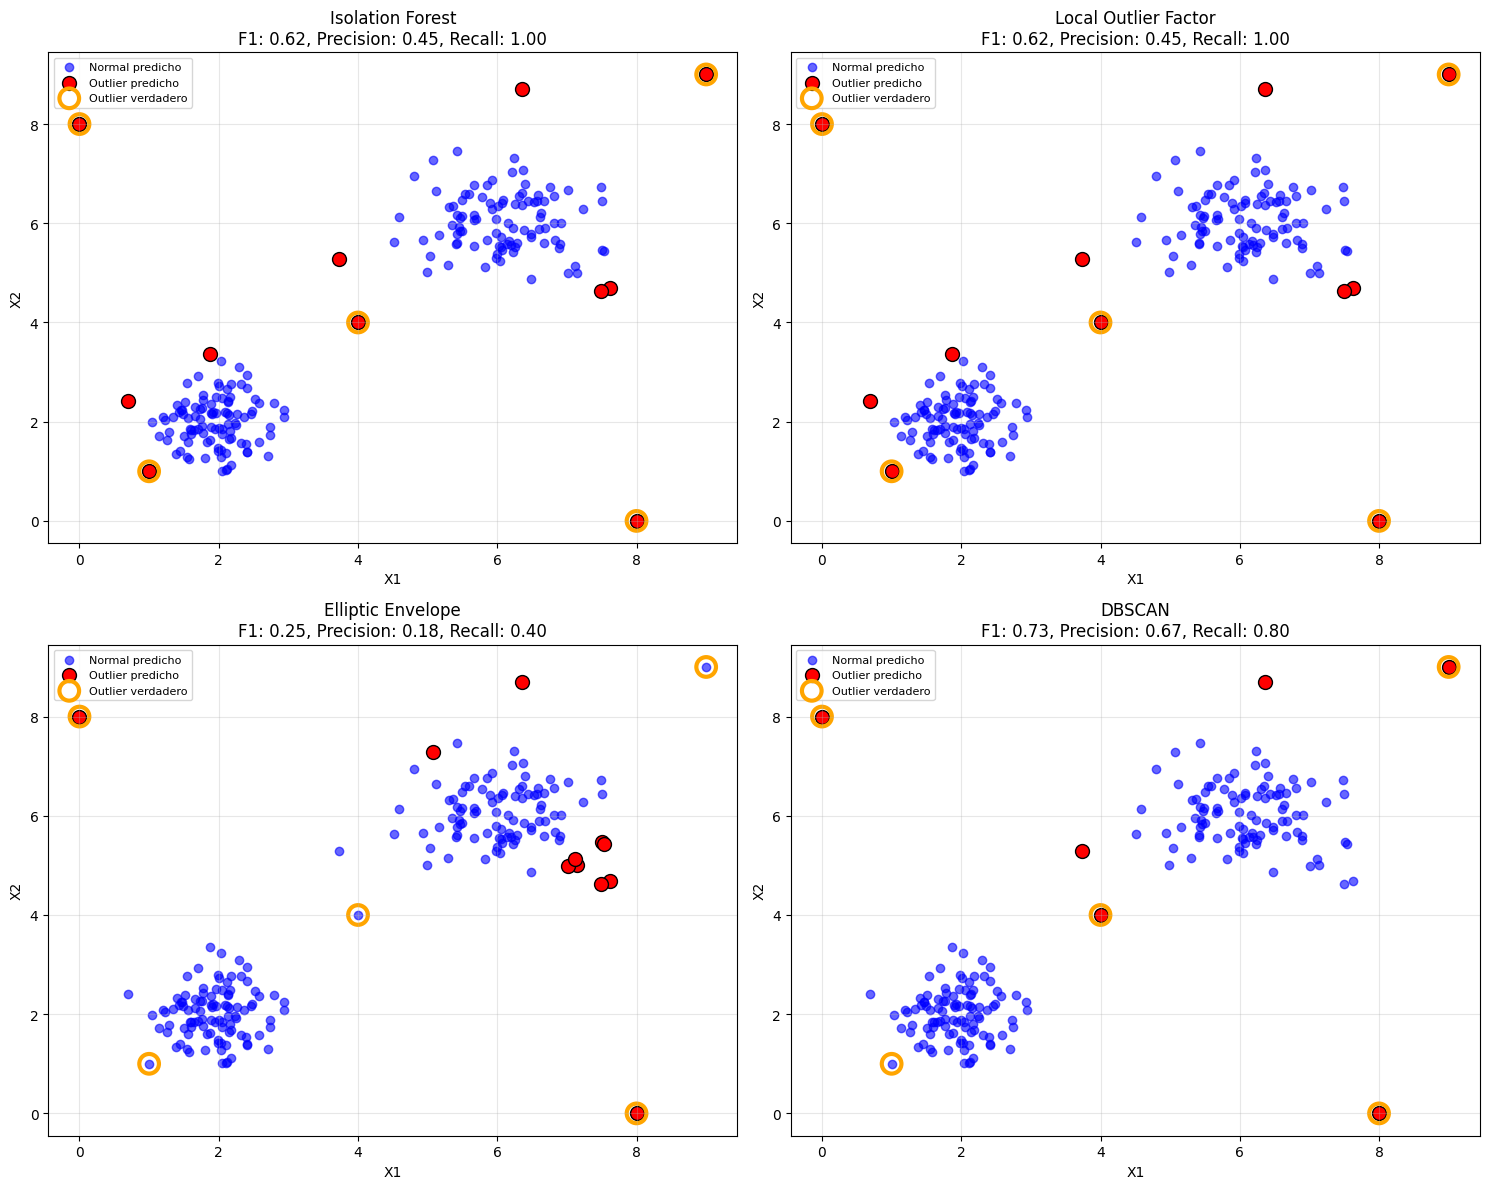

🔍 Comparación de algoritmos avanzados de detección:

Algoritmo            Precision  Recall     F1-Score  
Isolation Forest     0.455      1.000      0.625     
Local Outlier Factor 0.455      1.000      0.625     
Elliptic Envelope    0.182      0.400      0.250     
DBSCAN               0.667      0.800      0.727     

💡 Características de cada algoritmo:
• Isolation Forest: Buen balance, escala bien con Big Data
• LOF: Excelente para outliers locales/contextuales
• Elliptic Envelope: Asume distribución gaussiana
• DBSCAN: Encuentra clusters y outliers simultáneamente


In [10]:
# Técnicas avanzadas de detección de outliers
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

np.random.seed(42)

# Crear dataset multidimensional con outliers
# Datos normales: dos clusters
cluster1 = np.random.normal([2, 2], [0.5, 0.5], (100, 2))
cluster2 = np.random.normal([6, 6], [0.7, 0.7], (100, 2))
normal_data = np.vstack([cluster1, cluster2])

# Outliers de diferentes tipos
outliers = np.array([
    [0, 8],   # Outlier global
    [8, 0],   # Outlier global
    [4, 4],   # Outlier entre clusters
    [1, 1],   # Outlier dentro del primer cluster
    [9, 9]    # Outlier extremo
])

# Combinar datos
X_complete = np.vstack([normal_data, outliers])
true_labels = np.concatenate([np.ones(200), np.zeros(5)])  # 1=normal, 0=outlier

# Algoritmos de detección
algorithms = {
    'Isolation Forest': IsolationForest(contamination=0.05, random_state=42),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, contamination=0.05),
    'Elliptic Envelope': EllipticEnvelope(contamination=0.05, random_state=42),
    'DBSCAN': DBSCAN(eps=0.8, min_samples=5)
}

# Aplicar algoritmos
results_advanced = {}
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (name, algorithm) in enumerate(algorithms.items()):
    if name == 'DBSCAN':
        # DBSCAN usa fit_predict y marca outliers como -1
        labels = algorithm.fit_predict(X_complete)
        outlier_pred = (labels == -1).astype(int)
    elif name == 'Local Outlier Factor':
        # LOF usa fit_predict y marca outliers como -1
        outlier_pred = algorithm.fit_predict(X_complete)
        outlier_pred = (outlier_pred == -1).astype(int)
    else:
        # Isolation Forest y Elliptic Envelope usan predict
        algorithm.fit(X_complete)
        outlier_pred = algorithm.predict(X_complete)
        outlier_pred = (outlier_pred == -1).astype(int)
    
    # Calcular métricas
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    precision = precision_score(1 - true_labels, outlier_pred, zero_division=0)  # Invertir para outliers
    recall = recall_score(1 - true_labels, outlier_pred, zero_division=0)
    f1 = f1_score(1 - true_labels, outlier_pred, zero_division=0)
    
    results_advanced[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    # Visualizar
    # Datos normales
    normal_mask = outlier_pred == 0
    outlier_mask = outlier_pred == 1
    
    axes[i].scatter(X_complete[normal_mask, 0], X_complete[normal_mask, 1], 
                   c='blue', alpha=0.6, label='Normal predicho')
    axes[i].scatter(X_complete[outlier_mask, 0], X_complete[outlier_mask, 1], 
                   c='red', s=100, label='Outlier predicho', edgecolors='black')
    
    # Marcar outliers verdaderos
    true_outlier_mask = true_labels == 0
    axes[i].scatter(X_complete[true_outlier_mask, 0], X_complete[true_outlier_mask, 1], 
                   facecolors='none', edgecolors='orange', s=200, linewidth=3, 
                   label='Outlier verdadero')
    
    axes[i].set_title(f'{name}\nF1: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
    axes[i].set_xlabel('X1')
    axes[i].set_ylabel('X2')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de rendimiento
print("🔍 Comparación de algoritmos avanzados de detección:")
print("\n" + "="*60)
print(f"{'Algoritmo':<20} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("="*60)

for name, metrics in results_advanced.items():
    print(f"{name:<20} {metrics['Precision']:<10.3f} {metrics['Recall']:<10.3f} {metrics['F1-Score']:<10.3f}")

print("\n💡 Características de cada algoritmo:")
print("• Isolation Forest: Buen balance, escala bien con Big Data")
print("• LOF: Excelente para outliers locales/contextuales")
print("• Elliptic Envelope: Asume distribución gaussiana")
print("• DBSCAN: Encuentra clusters y outliers simultáneamente")

### Las herramientas que deberías conocer

Actualmente contamos con un arsenal de herramientas especializadas para trabajar con outliers:

#### **Librerías de programación:**
- **Python**: PyOD ofrece más de 20 algoritmos de detección de anomalías, scikit-learn incluye métodos como Isolation Forest, y statsmodels proporciona funciones estadísticas robustas
- **R**: Los paquetes outliers, MASS y robustbase ofrecen funcionalidades especializadas

#### **Plataformas de visualización:**
- **Tableau**: permite identificar valores atípicos visualmente con funciones estadísticas integradas
- **Power BI**: incluye análisis de anomalías que pueden detectar outliers automáticamente

#### **Herramientas empresariales:**
- **Dataiku DSS**: incorpora detección automática de outliers en su plataforma
- **IBM SPSS**: incluye métodos estadísticos robustos para manejar valores atípicos

Estas herramientas te permiten:
- Detectar automáticamente outliers en grandes conjuntos de datos
- Crear visualizaciones interactivas para explorar valores atípicos
- Integrar el tratamiento de outliers en tus flujos de trabajo analíticos

¡No dudes en probarlas en tu próximo proyecto!

In [11]:
# Demostración de herramientas y librerías disponibles
# Simulamos el uso de diferentes herramientas que puedes usar

print("🛠️ Herramientas recomendadas para trabajar con outliers:")
print("\n" + "="*70)

tools_info = {
    "Python - PyOD": {
        "descripcion": "Biblioteca especializada en detección de outliers",
        "algoritmos": ["ABOD", "CBLOF", "Feature Bagging", "HBOS", "IForest", "KNN", "LOF", "OCSVM"],
        "instalacion": "pip install pyod",
        "ventaja": "Más de 20 algoritmos especializados"
    },
    "Python - Scikit-learn": {
        "descripcion": "Algoritmos básicos pero efectivos",
        "algoritmos": ["IsolationForest", "LocalOutlierFactor", "OneClassSVM", "EllipticEnvelope"],
        "instalacion": "pip install scikit-learn",
        "ventaja": "Integración perfecta con pipelines ML"
    },
    "Python - Statsmodels": {
        "descripcion": "Métodos estadísticos robustos",
        "algoritmos": ["HuberRegressor", "QuantileRegression", "RobustLinearModel"],
        "instalacion": "pip install statsmodels",
        "ventaja": "Enfoque estadístico sólido"
    }
}

for tool, info in tools_info.items():
    print(f"\n📦 {tool}:")
    print(f"   Descripción: {info['descripcion']}")
    print(f"   Instalación: {info['instalacion']}")
    print(f"   Ventaja: {info['ventaja']}")
    print(f"   Algoritmos: {', '.join(info['algoritmos'][:4])}...")

print("\n\n🎯 Guía de selección de herramientas:")
print("\n" + "-"*50)

scenarios = {
    "Exploración inicial": "Usa matplotlib/seaborn para boxplots e histogramas",
    "Detección automática": "PyOD para múltiples algoritmos especializados",
    "Pipeline ML": "Scikit-learn para integración con modelos",
    "Análisis estadístico": "Statsmodels para métodos robustos",
    "Big Data": "Apache Spark MLlib o Dask-ML",
    "Tiempo real": "River (anteriormente creme) para streaming",
    "Visualización empresarial": "Tableau, Power BI, o Plotly Dash"
}

for scenario, recommendation in scenarios.items():
    print(f"• {scenario:.<25} {recommendation}")

print("\n\n💡 Ejemplo práctico - Flujo de trabajo recomendado:")
workflow_steps = [
    "1. Exploración visual (matplotlib, seaborn)",
    "2. Detección estadística (scipy.stats)",
    "3. Algoritmos avanzados (PyOD, sklearn)",
    "4. Validación y comparación (cross-validation)",
    "5. Integración en pipeline (sklearn.pipeline)",
    "6. Monitoreo en producción (MLflow, Weights & Biases)"
]

for step in workflow_steps:
    print(f"   {step}")

🛠️ Herramientas recomendadas para trabajar con outliers:


📦 Python - PyOD:
   Descripción: Biblioteca especializada en detección de outliers
   Instalación: pip install pyod
   Ventaja: Más de 20 algoritmos especializados
   Algoritmos: ABOD, CBLOF, Feature Bagging, HBOS...

📦 Python - Scikit-learn:
   Descripción: Algoritmos básicos pero efectivos
   Instalación: pip install scikit-learn
   Ventaja: Integración perfecta con pipelines ML
   Algoritmos: IsolationForest, LocalOutlierFactor, OneClassSVM, EllipticEnvelope...

📦 Python - Statsmodels:
   Descripción: Métodos estadísticos robustos
   Instalación: pip install statsmodels
   Ventaja: Enfoque estadístico sólido
   Algoritmos: HuberRegressor, QuantileRegression, RobustLinearModel...


🎯 Guía de selección de herramientas:

--------------------------------------------------
• Exploración inicial...... Usa matplotlib/seaborn para boxplots e histogramas
• Detección automática..... PyOD para múltiples algoritmos especializados
• Pipe

### Evita estos sesgos al trabajar con outliers

Al trabajar con outliers, debes estar alerta ante posibles sesgos:

#### **Sesgos comunes:**
- **Sesgo de confirmación**: Eliminar outliers solo porque contradicen tus hipótesis (¡esto es un grave error metodológico!)
- **Sesgo retrospectivo**: Identificar outliers después de ver los resultados (cherry-picking disfrazado de análisis)
- **Obsesión por la normalidad**: Asumir que toda distribución debería seguir una curva normal

#### **Para gestionar estos riesgos:**
- Documenta siempre tus decisiones sobre el tratamiento de outliers
- Establece protocolos claros antes de iniciar el análisis
- Considera el impacto ético de eliminar ciertos valores (especialmente en datos sensibles)

Por ejemplo, en un estudio médico, eliminar pacientes con respuestas "atípicas" a un tratamiento podría ocultar efectos secundarios importantes o subpoblaciones para las que el tratamiento no funciona.

## Recomendaciones finales para convertirte en experto

Para dominar el manejo de outliers, sigue estas recomendaciones:

### 🎯 **Principios fundamentales:**
1. **Contextualiza siempre**: Un outlier en finanzas personales es diferente a un outlier en astronomía. El contexto lo es todo.

2. **Sé transparente**: Documenta cualquier transformación o eliminación de datos. La reproducibilidad es fundamental en ciencia de datos.

3. **Adopta un enfoque iterativo**: Prueba diferentes estrategias y compara resultados metódicamente.

4. **Combina técnicas**: No te limites a un solo método. Utiliza tanto aproximaciones estadísticas como visualizaciones.

5. **Equilibra automatización y criterio experto**: Las herramientas pueden detectar outliers, pero tu conocimiento del dominio es crucial para interpretarlos correctamente.

### 🔮 **Tendencias futuras:**
Las tendencias que están definiendo el futuro de este campo incluyen:

- **Deep learning para detección de anomalías**: Especialmente efectivo en datos complejos como imágenes o series temporales.
- **Métodos adaptables al contexto**: Algoritmos que pueden distinguir entre diferentes tipos de outliers según el contexto.
- **Sistemas en tiempo real**: Capaces de detectar y responder a anomalías inmediatamente.
- **Explicabilidad**: No solo detectar outliers, sino también proporcionar razones sobre por qué ciertos valores se consideran atípicos.

---

## 🚀 ¡Tu próximo paso!

Ahora que tienes una comprensión sólida de los outliers, es momento de ponerla en práctica. Recuerda que dominar estos conceptos es fundamental para cualquier científico de datos que quiera obtener insights realmente valiosos de sus análisis.

Los outliers no son solo "problemas" que resolver, sino oportunidades para descubrir patrones ocultos, detectar fraudes, o identificar tendencias emergentes. La clave está en desarrollar el criterio para distinguir cuándo son señales valiosas y cuándo son ruido que distorsiona tus conclusiones.

**¡El conocimiento que has adquirido hoy puede ser la diferencia entre un análisis mediocre y descubrimientos que cambien tu negocio!**

In [12]:
# Resumen final y checklist para trabajar con outliers
print("✅ CHECKLIST DEFINITIVO PARA MANEJAR OUTLIERS")
print("=" * 60)

checklist = {
    "🔍 DETECCIÓN": [
        "☐ Exploración visual (boxplots, histogramas, scatter plots)",
        "☐ Métodos estadísticos (Z-score, IQR, percentiles)",
        "☐ Algoritmos avanzados (Isolation Forest, LOF, etc.)",
        "☐ Consideración del contexto (temporal, categórico)"
    ],
    "🤔 EVALUACIÓN": [
        "☐ ¿Es un error de medición o valor legítimo?",
        "☐ ¿Qué impacto tiene en mis métricas principales?",
        "☐ ¿Es importante para mi caso de uso específico?",
        "☐ ¿Podría ser una señal valiosa que no debo ignorar?"
    ],
    "🛠️ TRATAMIENTO": [
        "☐ Eliminación (si son claramente errores)",
        "☐ Transformación (log, sqrt, Box-Cox)",
        "☐ Imputación (mediana, regresión)",
        "☐ Modelos robustos (que resistan outliers)"
    ],
    "📊 VALIDACIÓN": [
        "☐ Análisis de sensibilidad (con/sin outliers)",
        "☐ Validación cruzada de diferentes estrategias",
        "☐ Comparación de métricas de rendimiento",
        "☐ Documentación de decisiones tomadas"
    ]
}

for category, items in checklist.items():
    print(f"\n{category}:")
    for item in items:
        print(f"  {item}")

print("\n\n🎯 REGLAS DE ORO:")
golden_rules = [
    "1. El contexto es REY - Un mismo valor puede ser normal o atípico según el dominio",
    "2. Transparencia total - Documenta TODAS tus decisiones sobre outliers",
    "3. No elimines por conveniencia - Solo si tienes una justificación sólida",
    "4. Combina múltiples enfoques - Una sola técnica nunca es suficiente",
    "5. Piensa en el usuario final - ¿Cómo afecta tu decisión a las conclusiones?"
]

for rule in golden_rules:
    print(f"  {rule}")

print("\n\n💡 MENSAJE FINAL:")
print("Los outliers no son tus enemigos - son información valiosa disfrazada.")
print("Tu trabajo como científico de datos es descifrar qué te están diciendo.")
print("\n¡Ahora tienes todas las herramientas para hacerlo como un experto! 🚀")

✅ CHECKLIST DEFINITIVO PARA MANEJAR OUTLIERS

🔍 DETECCIÓN:
  ☐ Exploración visual (boxplots, histogramas, scatter plots)
  ☐ Métodos estadísticos (Z-score, IQR, percentiles)
  ☐ Algoritmos avanzados (Isolation Forest, LOF, etc.)
  ☐ Consideración del contexto (temporal, categórico)

🤔 EVALUACIÓN:
  ☐ ¿Es un error de medición o valor legítimo?
  ☐ ¿Qué impacto tiene en mis métricas principales?
  ☐ ¿Es importante para mi caso de uso específico?
  ☐ ¿Podría ser una señal valiosa que no debo ignorar?

🛠️ TRATAMIENTO:
  ☐ Eliminación (si son claramente errores)
  ☐ Transformación (log, sqrt, Box-Cox)
  ☐ Imputación (mediana, regresión)
  ☐ Modelos robustos (que resistan outliers)

📊 VALIDACIÓN:
  ☐ Análisis de sensibilidad (con/sin outliers)
  ☐ Validación cruzada de diferentes estrategias
  ☐ Comparación de métricas de rendimiento
  ☐ Documentación de decisiones tomadas


🎯 REGLAS DE ORO:
  1. El contexto es REY - Un mismo valor puede ser normal o atípico según el dominio
  2. Transparenc